## Reglas de Asociación

### 1) Descubrimiento de asociaciones

- Búsqueda de patrones frecuentes, asociaciones, correlaciones o estructuras causales entre conjuntos de artículos u objetos (datos) a partir de bases de datos transaccionales, relacionales y conjuntos de datos.


- Búsqueda de secuencias o patrones temporales


- Aplicaciones:
    - Análisis de carritos de compra
    - Diseño de catálogos,...
    - ¿Qué hay en el carrito? corbatas
    - ¿Cómo motivar al cliente a comprar los artículos que es probable que le gusten?


### 2) Reglas de asociación

- Objetivo de los algoritmos de extracción de reglas de asociación:
    - Dada una **base de datos de transacciones**, donde cada transacción es una lista de artículos (comprados por un cliente en una misma visita)
        
    - Encontrar todas las reglas que corelacionen la presencia de un conjunto de artículos con otro conjunto de artículos.
    
    - Ejemplo : 89% de la gente que compra neumáticos y accesorios para el automóvil, también requiere servicios.
    
    
La idea es obtener reglas de tipo:

- Antecedente => Consecuente [soporte, confianza]
- Compra (x , pañales) => compra(x, cerveza) [0.5% , 60%]


- Encontrar todas las reglas X ^ Y => Z con un mínimo de confianza y de soporte

- Soporte (s): La probabilidad de que una transacción cotenga {X ^ Y ^ Z}

- Confianza (c): Probabilidad condicional P( Z | X ^ Y )


### El soporte habitual podría ir entre el 5 y 10 %

Con un **Soporte**:

- Alto => habrá pocas reglas que ocurren con frecuencia (obviedades)
- Bajo => habrá muchas reglas que ocurren raramente ()


Con una **Confianza:**

- Alta => pocas reglas, pero todas **casi ciertas logicamente**

- Baja => muchas reglas, pero muchas de ellas muy **inciertas**

Un ejemplo de **Soporte** sería, dentro de todas las transacciones, el % frecuencia de la familia Corbata

y de **Confianza** sería, dentro del número de transacciones con Corbata, el % de otra Familia (Camisa p.e.)

#### Valores típicos

**Soporte:** 2-10 %

**Confianza** 70-90%

**Lift** hacer caso al lift > 1

### Lift
 ~~~py
    Lift(Burger→Ketchup) = (Confidence (Burger→Ketchup))/(Support (Ketchup))

    Lift(Burger→Ketchup) = 33.3/10
                     = 3.33
 ~~~
Básicamente, Lift nos dice que la probabilidad de comprar Burger y Ketchup juntos es 3.33 veces más que la probabilidad de comprar solo el ketchup. Un Lift de 1 significa que no hay asociación entre los productos A y B. Un Lift de más de 1 significa que los productos A y B tienen más probabilidades de comprarse juntos. Finalmente, un Lift de menos de 1 se refiere al caso en el que es poco probable que dos productos se compren juntos.
 
### 3) El algoritmo APRIORI

- Ecuentra las asociaciones más frecuentes 
- Itera sobre la base de datos hasta que las asociaciones obtenidas no tienen el soporte mínimo.
- Método simple pero robusto
- Salida intuitiva


- Requisitos:
  + No necesita fijar los atributos de los lados derecho (consecuente) e izquierdo (antecedente) de las reglas, pues se generan de manera automática
  + Existen variedades para tratar todo tipo de datos
  + Especificar mínimo soporte
  + Especificar máximo número de reglas.
  
El algortimo busca iterativamente conjuntos frecuentes con cardinalidad 1 hasta k (k-conjunto), y después **usa los conjuntos frecuentes para crear reglas de asociación.**

En el paso clave del descubrimiento de **conjuntos frecuentes**, se basa en el principio "a priori"

- Cualquier subconjunto de un conjunto de artículos frecuente debe ser frecuente 
  
  Ejemplo: si {A B} es un conjunto frecuente, entonces tanto {A} como {B} deberían ser frecuentes
  
Y por el contrario si existe algún conjunto "infrecuente", entonces no hay necesidad de generar sus superconjuntos

In [15]:
import pandas as pd
import pyodbc

#pyodbc
server = 'tcp:190.27.1.13\BI'
database = 'dbRoberts'
username = 'srodriguez'
password = 'Zmadgfv1'

cnxn = pyodbc.connect('DRIVER={ODBC Driver 13 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()


consulta = '''  select Marcas from Apriori_RB where Marcas <> '' and Fecha>='20220101' and Fecha <='20230701'   '''

resultado = []


registros = cursor.execute(consulta).fetchall()



In [16]:
print('Registros : ',len(registros))

Registros :  17212


In [17]:
for x in registros:
    resultado.append(x.Marcas.split(","))

In [ ]:
# resultado

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori

In [18]:
reglas_asociacion = apriori(resultado, min_support=0.005,min_confidence=0.20, min_lift=1,min_length=2)

resultados_asociacion=list(reglas_asociacion)

In [19]:
#Filtramos para solo obtener asociaciones con más de un elemento, pues en los resultados nos arroja a partir de 1
# aunque los resultados de un elemento nos ayudaría a obtener la frecuencia (sporte) de cada producto individualmente

resultados_asociacion = list(filter(lambda x: len(x[0])>1 , resultados_asociacion))

In [20]:
print(len(resultados_asociacion))

17


## Resultados 
- Cada resultado podría tener varias combinaciones con el antecesor y el consecuente siempre y cuando estas cumplan con el mínimo de confianza.


La cantidad de resultados relacionados o derivados pueden verse así:
~~~py
for w in resultados_asociacion:
    print(len(w[2]))
~~~

Así que en un resultado dependiendo de la cantidad de items dentro de su conjunto se asociación pordría darse una multiplicaidad de resultados. 

Estos resultados se encontrarán anidados dentro del tercer elemento de la lista para cada resultado. o sea

- El primer elemento contiene el conjunto de elementos en los resutados

- EL segundo elemento contiene el Soporte del Resultado

- El tercer elemento contiene las estadísticas para cada cobinación de resultados 


Guardaremos todos los resultados en un DataFrame en **Pandas** para su óptima lectura

In [19]:
reg=0
print(resultados_asociacion[reg],'\n\n')

print(list(resultados_asociacion[reg][0]))
print(len(resultados_asociacion[reg][0]),'\n')


print(resultados_asociacion[reg][1],'\n')

print(resultados_asociacion[reg][2])
print(len(resultados_asociacion[reg][2]))

RelationRecord(items=frozenset({'BOGGI', 'HUGO BOSS'}), support=0.013157894736842105, ordered_statistics=[OrderedStatistic(items_base=frozenset({'BOGGI'}), items_add=frozenset({'HUGO BOSS'}), confidence=0.35, lift=1.3112676056338026)]) 


['BOGGI', 'HUGO BOSS']
2 

0.013157894736842105 

[OrderedStatistic(items_base=frozenset({'BOGGI'}), items_add=frozenset({'HUGO BOSS'}), confidence=0.35, lift=1.3112676056338026)]
1


In [21]:
resultados = []
antecedente=''
consecuente=''
for res in resultados_asociacion:
    
    for sub in range(len(res[2])):
        #print(res[2][sub],'\n')
        antecedente=""
        consecuente=""
        
        conjunto = ','.join(list(res[0]))
        soporte = res[1]
        antecedente = ','.join(list(res[2][sub][0]))
        consecuente=','.join(list(res[2][sub][1]))
        confianza = res[2][sub][2]
        Lift = res[2][sub][3]
        
        resultados.append(list((conjunto,soporte,antecedente,consecuente,confianza,Lift)))
        #antecedente= list(res[2][sub][0])
        #consecuente = list(res[2][sub][1])
        print('Conjunto : ',conjunto,'\nSoporte : ',res[1],'\n',antecedente, ' => ',consecuente ,'\nConfianza : ',confianza, '\nLift : ',Lift,'\n')
        
        

Conjunto :  CALDE UPPE,ROBERTS SP 
Soporte :  0.020625145247501742 
 CALDE UPPE  =>  ROBERTS SP 
Confianza :  0.22625876354365837 
Lift :  1.6240057706895115 

Conjunto :  CALDERONIB,CALDERONI 
Soporte :  0.0285847083430165 
 CALDERONIB  =>  CALDERONI 
Confianza :  0.39328537170263794 
Lift :  1.287904835948593 

Conjunto :  ROBERTS SA,ROBERTS 
Soporte :  0.005054613060655357 
 ROBERTS SA  =>  ROBERTS 
Confianza :  0.5686274509803922 
Lift :  1.2448760730443285 

Conjunto :  ROBERTSBAS,ROBERTS 
Soporte :  0.04671159656053916 
 ROBERTSBAS  =>  ROBERTS 
Confianza :  0.5173745173745173 
Lift :  1.1326698286759338 

Conjunto :  CALDE UPPE,ROBERTS,CALDERONI 
Soporte :  0.011155008133860098 
 CALDE UPPE,CALDERONI  =>  ROBERTS 
Confianza :  0.4571428571428572 
Lift :  1.000806773994258 

Conjunto :  CALDE UPPE,ROBERTS,CALDERONI 
Soporte :  0.011155008133860098 
 CALDE UPPE,ROBERTS  =>  CALDERONI 
Confianza :  0.4067796610169491 
Lift :  1.3320950390836621 

Conjunto :  CALDE UPPE,ROBERTS SP,C

In [22]:
Asociaciones = pd.DataFrame(resultados,columns=['Conjunto','Soporte','Antecedente','Consecuente','Confianza','Lift'])

In [23]:
Asociaciones

Conjunto   Soporte            Antecedente  \
0             CALDE UPPE,ROBERTS SP  0.020625             CALDE UPPE   
1              CALDERONIB,CALDERONI  0.028585             CALDERONIB   
2                ROBERTS SA,ROBERTS  0.005055             ROBERTS SA   
3                ROBERTSBAS,ROBERTS  0.046712             ROBERTSBAS   
4      CALDE UPPE,ROBERTS,CALDERONI  0.011155   CALDE UPPE,CALDERONI   
5      CALDE UPPE,ROBERTS,CALDERONI  0.011155     CALDE UPPE,ROBERTS   
6   CALDE UPPE,ROBERTS SP,CALDERONI  0.006100   CALDE UPPE,CALDERONI   
7   CALDE UPPE,ROBERTS SP,CALDERONI  0.006100   ROBERTS SP,CALDERONI   
8     CALDE UPPE,ROBERTS SP,ROBERTS  0.007785     CALDE UPPE,ROBERTS   
9      CALDERONIB,ROBERTS,CALDERONI  0.013711   CALDERONIB,CALDERONI   
10     CALDERONIB,ROBERTS,CALDERONI  0.013711     CALDERONIB,ROBERTS   
11     ROBERTS,G.VALENTIN,CALDERONI  0.009180     ROBERTS,G.VALENTIN   
12      HUGO BOSS,ROBERTS,CALDERONI  0.009354    HUGO BOSS,CALDERONI   
13      HUGO BOSS,ROBERTS,CALDERONI  0.009354      HUGO BOSS,ROBERTS   
14     ROBERTS RE,ROBERTS,CALDERONI  0.021903   ROBERTS RE,CALDERONI   
15     ROBERTS,ROBERTS SP,CALDERONI  0.012666   ROBERTS SP,CALDERONI   
16     ROBERTS,ROBERTS SP,CALDERONI  0.012666     ROBERTS SP,ROBERTS   
17     ROBERTSBAS,ROBERTS,CALDERONI  0.015222   ROBERTSBAS,CALDERONI   
18     ROBERTSBAS,ROBERTS,CALDERONI  0.015222     ROBERTSBAS,ROBERTS   
19    ROBERTS RE,CALDERONIB,ROBERTS  0.005055  ROBERTS RE,CALDERONIB   
20    ROBERTSBAS,CALDERONIB,ROBERTS  0.005519  ROBERTSBAS,CALDERONIB   
21     HUGO BOSS,ROBERTS RE,ROBERTS  0.005752      HUGO BOSS,ROBERTS   
22     HUGO BOSS,ROBERTS RE,ROBERTS  0.005752   HUGO BOSS,ROBERTS RE   
23    ROBERTSBAS,ROBERTS RE,ROBERTS  0.011097     ROBERTSBAS,ROBERTS   
24    ROBERTSBAS,ROBERTS RE,ROBERTS  0.011097  ROBERTSBAS,ROBERTS RE   

   Consecuente  Confianza      Lift  
0   ROBERTS SP   0.226259  1.624006  
1    CALDERONI   0.393285  1.287905  
2      ROBERTS   0.568627  1.244876  
3      ROBERTS   0.517375  1.132670  
4      ROBERTS   0.457143  1.000807  
5    CALDERONI   0.406780  1.332095  
6   ROBERTS SP   0.250000  1.794412  
7   CALDE UPPE   0.239180  2.623815  
8   ROBERTS SP   0.283898  2.037722  
9      ROBERTS   0.479675  1.050135  
10   CALDERONI   0.494759  1.620204  
11   CALDERONI   0.337607  1.105572  
12     ROBERTS   0.490854  1.074609  
13   CALDERONI   0.409669  1.341558  
14     ROBERTS   0.501330  1.097544  
15     ROBERTS   0.496583  1.087152  
16   CALDERONI   0.310984  1.018391  
17     ROBERTS   0.642157  1.405851  
18   CALDERONI   0.325871  1.067140  
19     ROBERTS   0.564935  1.236792  
20     ROBERTS   0.641892  1.405271  
21  ROBERTS RE   0.251908  1.164924  
22     ROBERTS   0.487685  1.067671  
23  ROBERTS RE   0.237562  1.098582  
24     ROBERTS   0.570149  1.248208

In [12]:
import networkx as nx

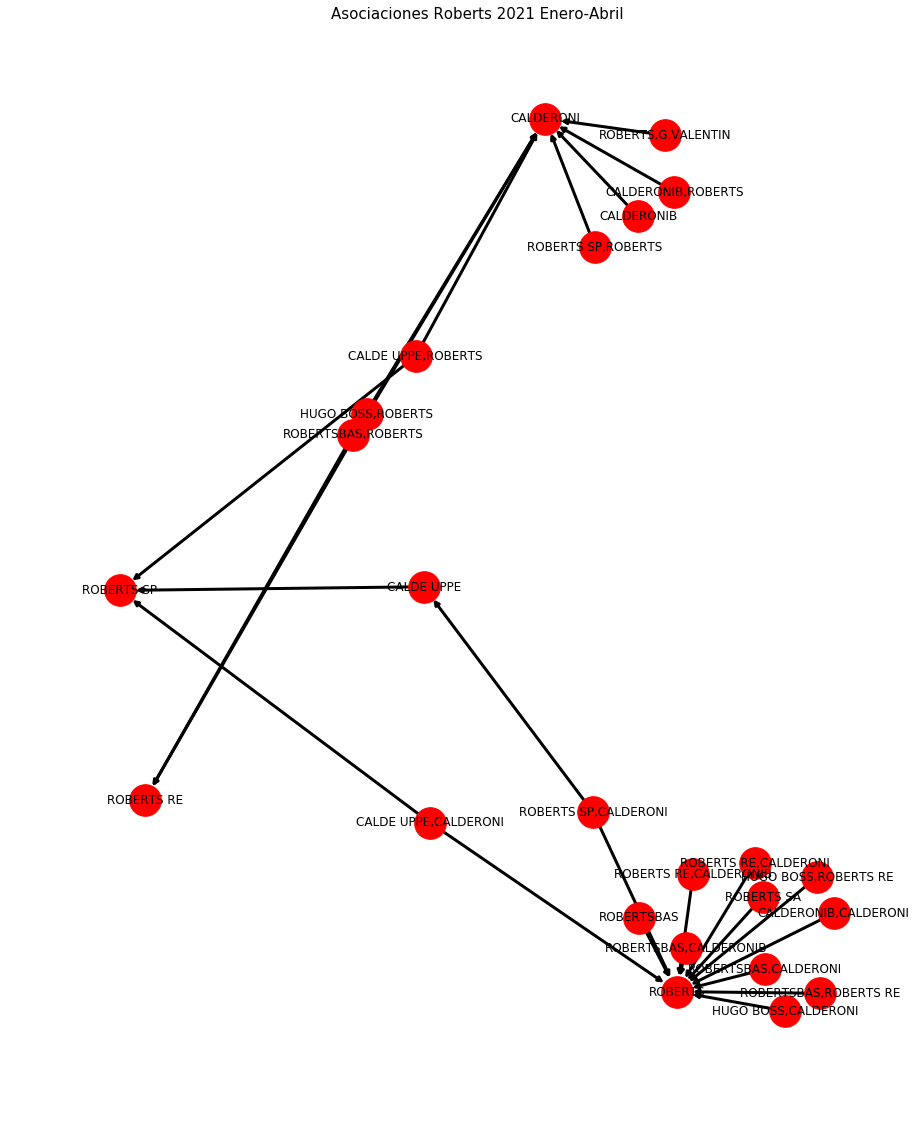

In [26]:
titulo = "Asociaciones Roberts 2021 Enero-Abril"
G = nx.DiGraph()
plt.figure(figsize=(12,15))

G.add_weighted_edges_from( list((row[2],row[3],row[4])) for row in resultados )

labels = nx.get_edge_attributes(G,'weight')

nx.draw(G, with_labels=True,node_size=1000, width=3)
#nx.draw_networkx_edge_labels(G,edge_labels=[b for a,b in labels.items()])

plt.title(titulo,size=15)

plt.draw()
plt.savefig(titulo+'.pdf')

Asociaciones.to_excel(titulo+'.xlsx', index=False, encoding='utf-8-sig')

plt.show()

In [13]:
resultados

[['CALDERONI,CALDERONIC',
  0.01146048670801146,
  'CALDERONIC',
  'CALDERONI',
  0.28407047824523557,
  1.7755531796381832],
 ['CANALI,HUGO BOSS',
  0.01059006999601059,
  'CANALI',
  'HUGO BOSS',
  0.28410196536291105,
  1.370315133287539],
 ['HL TAILOR,HL SLIM FI',
  0.03783411308163783,
  'HL TAILOR',
  'HL SLIM FI',
  0.3276793567031034,
  1.3954688941980462],
 ['HL SLIM FI,HL TRENDY',
  0.01156928879701157,
  'HL TRENDY',
  'HL SLIM FI',
  0.3737113402061856,
  1.5915026076522343],
 ['SIDI LE CO,HL TAILOR',
  0.007173684401407174,
  'SIDI LE CO',
  'HL TAILOR',
  0.20582726326742976,
  1.7826596086420532],
 ['Z ZEGNA,HUGO BOSS',
  0.012954702063612955,
  'Z ZEGNA',
  'HUGO BOSS',
  0.3696957151728421,
  1.7831613116993974],
 ['CALDE UPPE,HL SLIM FI,H.LIFE',
  0.006506364922206506,
  'CALDE UPPE,HL SLIM FI',
  'H.LIFE',
  0.46070878274268107,
  1.2074753114486088],
 ['CALDERONI,HL SLIM FI,H.LIFE',
  0.01383962572081384,
  'CALDERONI,H.LIFE',
  'HL SLIM FI',
  0.30232926636032326,
